<a href="https://colab.research.google.com/github/vp1206vp/Tree_Classification/blob/main/TREECLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# New section

In [2]:
import zipfile
import os
zip_path = "/content/drive/MyDrive/DATASET.zip"
extract_path = "/content/Tree_Species_Dataset"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)
print("Extraction complete.")



Extraction complete.


In [3]:
from collections import defaultdict

dataset_path = os.path.join(extract_path, "Tree_Species_Dataset")
image_counts = defaultdict(int)

for folder in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, folder)
    if os.path.isdir(folder_path):
        images = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        image_counts[folder] = len(images)

for k, v in sorted(image_counts.items(), key=lambda x: x[1], reverse=True):
    print(f"{k}: {v}")
print('Total Images:',sum(image_counts.values()))

other: 150
coconut: 50
sonmahor: 50
bamboo: 50
kesudo: 50
sitafal: 50
simlo: 50
saptaparni: 50
neem: 50
gulmohor: 50
vad: 50
babul: 50
mango: 50
motichanoti: 50
khajur: 50
champa: 50
kanchan: 50
nilgiri: 50
gunda: 50
sugarcane: 50
jamun: 50
pilikaren: 50
cactus: 50
amla: 50
shirish: 50
pipal: 50
banyan: 50
bili: 50
asopalav: 50
garmalo: 50
.git: 0
Total Images: 1600


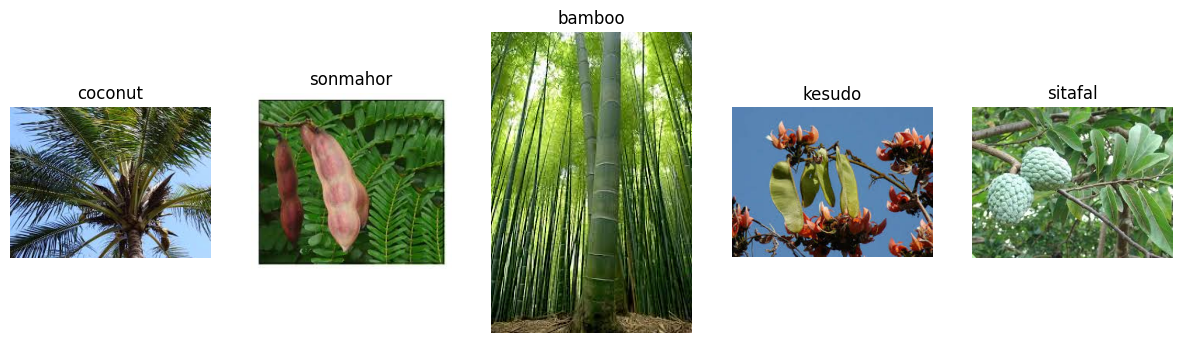

In [4]:
import matplotlib.pyplot as plt
from PIL import Image
def show_sample_images(dataset_path, n=5):
    class_dirs = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]

    plt.figure(figsize=(15, 10))
    for i, class_dir in enumerate(class_dirs[:n]):
        class_folder = os.path.join(dataset_path, class_dir)
        image_files = [f for f in os.listdir(class_folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        if not image_files:
            continue
        image_path = os.path.join(class_folder, image_files[0])
        img = Image.open(image_path)

        plt.subplot(1, n, i + 1)
        plt.imshow(img)
        plt.title(class_dir)
        plt.axis('off')

    plt.show()
show_sample_images(dataset_path)


In [5]:
import pandas as pd
from PIL import Image

image_shapes = []

for folder in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, folder)
    if os.path.isdir(folder_path):
        for img_file in os.listdir(folder_path):
            if img_file.lower().endswith(('.jpg', '.jpeg', '.png')):
                img_path = os.path.join(folder_path, img_file)
                try:
                    with Image.open(img_path) as img:
                        image_shapes.append(img.size)
                except Exception as e:
                    print(f"Failed to read {img_path}: {e}")


shapes_df = pd.DataFrame(image_shapes, columns=["Width", "Height"])
shapes_df.head()
print(shapes_df.describe())


             Width       Height
count  1600.000000  1600.000000
mean    312.623125   269.821875
std     296.220501   278.014229
min     141.000000   128.000000
25%     225.000000   183.000000
50%     259.000000   200.000000
75%     275.000000   259.000000
max    4000.000000  4032.000000


In [6]:
import hashlib
from collections import defaultdict

hashes = defaultdict(list)

for folder in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, folder)
    if os.path.isdir(folder_path):
        for img_file in os.listdir(folder_path):
            if img_file.lower().endswith(('.jpg', '.jpeg', '.png')):
                img_path = os.path.join(folder_path, img_file)
                try:
                    with open(img_path, 'rb') as f:
                        file_hash = hashlib.md5(f.read()).hexdigest()
                        hashes[file_hash].append(img_path)
                except Exception as e:
                    print(f"Error reading {img_path}: {e}")


duplicates = {h: files for h, files in hashes.items() if len(files) > 1}
print("Duplicate image sets found:", len(duplicates))


for i, (hash_val, paths) in enumerate(duplicates.items()):
    print(f"\nDuplicate Set {i+1}:")
    for path in paths:
        print(f"  - {path}")
    if i == 2:
        break


Duplicate image sets found: 82

Duplicate Set 1:
  - /content/Tree_Species_Dataset/Tree_Species_Dataset/coconut/download (3).jpg
  - /content/Tree_Species_Dataset/Tree_Species_Dataset/coconut/download (1).jpg

Duplicate Set 2:
  - /content/Tree_Species_Dataset/Tree_Species_Dataset/sonmahor/download (19).jpeg
  - /content/Tree_Species_Dataset/Tree_Species_Dataset/sonmahor/download (6).jpeg

Duplicate Set 3:
  - /content/Tree_Species_Dataset/Tree_Species_Dataset/kesudo/images (31).jpeg
  - /content/Tree_Species_Dataset/Tree_Species_Dataset/kesudo/images (33).jpeg


In [7]:
from PIL import Image

corrupt_images = []

for folder in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, folder)
    if os.path.isdir(folder_path):
        for img_file in os.listdir(folder_path):
            if img_file.lower().endswith(('.jpg', '.jpeg', '.png')):
                img_path = os.path.join(folder_path, img_file)
                try:
                    img = Image.open(img_path)
                    img.verify()
                except Exception as e:
                    corrupt_images.append(img_path)

print("Corrupted images found:", len(corrupt_images))
for path in corrupt_images[:5]:
    print("Corrupt:", path)


Corrupted images found: 0



Duplicate set 1 (2 images):


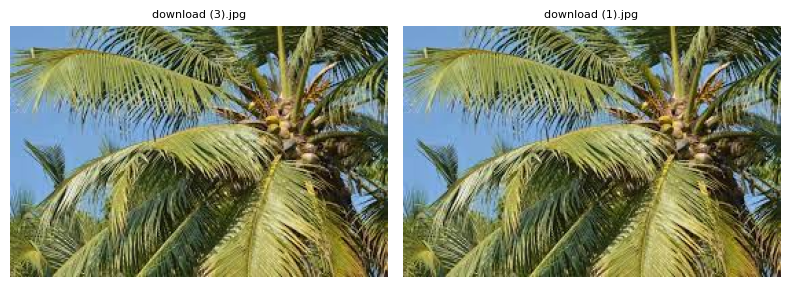


Duplicate set 2 (2 images):


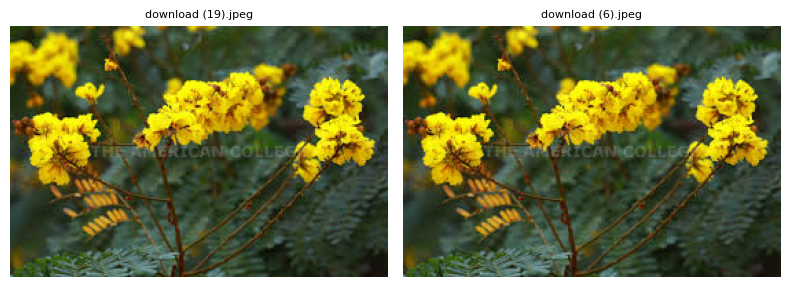


Duplicate set 3 (2 images):


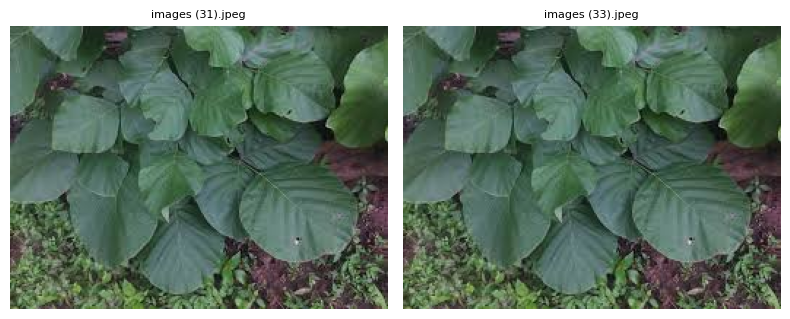

In [8]:
import matplotlib.pyplot as plt
from PIL import Image
import os

def show_duplicate_sets(duplicates, sets_to_display=3):
    shown = 0
    for hash_val, dup_paths in duplicates.items():
        if shown >= sets_to_display:
            break
        print(f"\nDuplicate set {shown + 1} ({len(dup_paths)} images):")
        plt.figure(figsize=(4 * len(dup_paths), 4))
        for i, img_path in enumerate(dup_paths):
            try:
                img = Image.open(img_path)
                plt.subplot(1, len(dup_paths), i + 1)
                plt.imshow(img)
                plt.title(os.path.basename(img_path), fontsize=8)
                plt.axis('off')
            except Exception as e:
                print(f"Failed to display {img_path}: {e}")
                continue
        plt.tight_layout()
        plt.show()
        shown += 1

# Call this after building `duplicates` dict
show_duplicate_sets(duplicates, sets_to_display=3)


In [9]:
import os
import hashlib
from collections import defaultdict
removed_count = 0

for dup_list in duplicates.values():
    for img_path in dup_list[1:]:
        try:
            os.remove(img_path)
            removed_count += 1
        except Exception as e:
            print(f"Error deleting {img_path}: {e}")

print(f"✅ Removed {removed_count} duplicate images.")

✅ Removed 86 duplicate images.


In [10]:
hashes = defaultdict(list)

for folder in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, folder)
    if os.path.isdir(folder_path):
        for img_file in os.listdir(folder_path):
            if img_file.lower().endswith(('.jpg', '.jpeg', '.png')):
                img_path = os.path.join(folder_path, img_file)
                try:
                    with open(img_path, 'rb') as f:
                        file_hash = hashlib.md5(f.read()).hexdigest()
                        hashes[file_hash].append(img_path)
                except Exception as e:
                    print(f"Error reading {img_path}: {e}")

duplicates = {h: files for h, files in hashes.items() if len(files) > 1}
print("🔁 Duplicates remaining:", len(duplicates))

🔁 Duplicates remaining: 0


In [11]:
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import os

# Gather image info from dataset_path
image_info = []

for folder in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, folder)
    if os.path.isdir(folder_path):
        for img_file in os.listdir(folder_path):
            if img_file.lower().endswith(('.jpg', '.jpeg', '.png')):
                img_path = os.path.join(folder_path, img_file)
                try:
                    with Image.open(img_path) as img:
                        width, height = img.size
                        image_info.append({
                            'path': img_path,
                            'width': width,
                            'height': height,
                            'class': folder
                        })
                except:
                    continue

df_sizes = pd.DataFrame(image_info)

# Define thresholds
small_imgs = df_sizes[(df_sizes['width'] < 150) | (df_sizes['height'] < 150)]
large_imgs = df_sizes[(df_sizes['width'] > 1000) | (df_sizes['height'] > 2000)]

print(f"🔻 Very small images: {len(small_imgs)}")
print(f"🔺 Very large images: {len(large_imgs)}")



🔻 Very small images: 20
🔺 Very large images: 40


In [12]:
import shutil
import os

git_folder = "/path/to/your/dataset/.git"  # change this path

if os.path.exists(git_folder):
    shutil.rmtree(git_folder)
    print(".git folder removed.")
else:
    print("No .git folder found.")




No .git folder found.


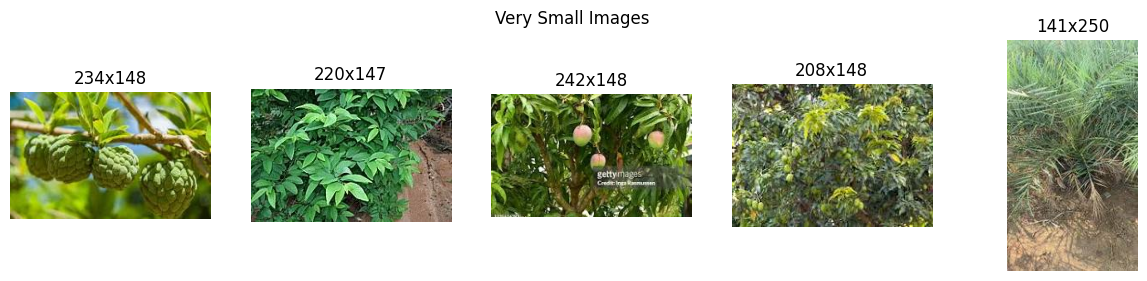

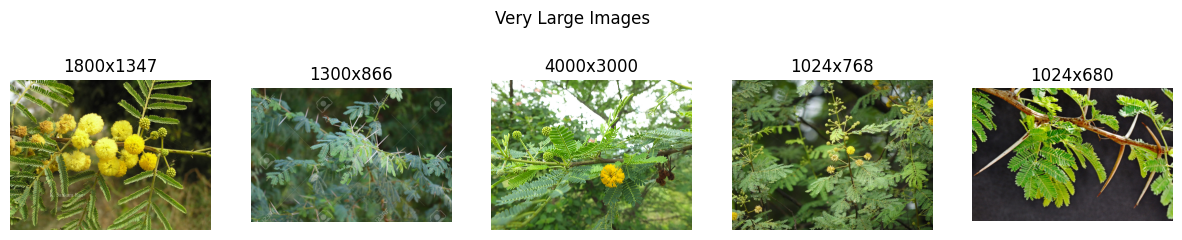

In [13]:
def show_images(df_subset, title, n=5):
    plt.figure(figsize=(15, 3))
    for i, (_, row) in enumerate(df_subset.head(n).iterrows()):
        img = Image.open(row['path'])
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.title(f"{row['width']}x{row['height']}")
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

show_images(small_imgs, "Very Small Images")
show_images(large_imgs, "Very Large Images")

In [14]:
import os
from PIL import Image
import pandas as pd

# Combine and remove outliers
outliers = pd.concat([small_imgs, large_imgs])

removed_count = 0
for path in outliers['path']:
    try:
        os.remove(path)
        removed_count += 1
    except Exception as e:
        print(f"Failed to remove {path}: {e}")

print(f"🗑️ Removed {removed_count} outlier images (small + large).")

🗑️ Removed 60 outlier images (small + large).


In [15]:
image_info = []

for folder in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, folder)
    if os.path.isdir(folder_path):
        for img_file in os.listdir(folder_path):
            if img_file.lower().endswith(('.jpg', '.jpeg', '.png')):
                img_path = os.path.join(folder_path, img_file)
                try:
                    with Image.open(img_path) as img:
                        width, height = img.size
                        image_info.append({
                            'path': img_path,
                            'width': width,
                            'height': height,
                            'class': folder
                        })
                except:
                    continue

df_sizes = pd.DataFrame(image_info)
print(df_sizes[['width', 'height']].describe())

             width       height
count  1454.000000  1454.000000
mean    275.872765   239.044704
std     117.507849   117.197342
min     150.000000   150.000000
25%     225.000000   183.000000
50%     259.000000   198.000000
75%     275.000000   256.000000
max    1000.000000  1247.000000


In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (224, 224)
BATCH_SIZE = 32
dataset_path="/content/Tree_Species_Dataset/Tree_Species_Dataset"

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

train_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)


Found 1177 images belonging to 31 classes.
Found 277 images belonging to 31 classes.


In [17]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
IMG_HEIGHT, IMG_WIDTH = IMG_SIZE
base_model = EfficientNetB0(include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3), weights='imagenet')
base_model.trainable = False  # Freeze base model

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(train_gen.num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Show model summary
model.summary()


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 31)             │         3,999 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,217,538 (16.09 MB)

 Trainable params: 167,967 (656.12 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [18]:
EPOCHS = 10

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 151s 4s/step - accuracy: 0.0400 - loss: 3.4637 - val_accuracy: 0.0903 - val_loss: 3.3883
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 136s 4s/step - accuracy: 0.0759 - loss: 3.4169 - val_accuracy: 0.0903 - val_loss: 3.3881
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 129s 4s/step - accuracy: 0.0842 - loss: 3.3971 - val_accuracy: 0.0903 - val_loss: 3.3827
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 141s 3s/step - accuracy: 0.0736 - loss: 3.4117 - val_accuracy: 0.0903 - val_loss: 3.3887
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 130s 4s/step - accuracy: 0.0839 - loss: 3.4067 - val_accuracy: 0.0903 - val_loss: 3.3871
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 144s 4s/step - accuracy: 0.0805 - loss: 3.3923 - val_accuracy: 0.0903 - val_loss: 3.3796
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 145s 4s/step - accuracy: 0.0816 - loss: 3.3862 - val_accuracy: 0.0903 - val_loss: 3.3764
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 125s 3s/step - accuracy: 0.0792 - loss: 3.3997 - val_accuracy: 0.0903 - v

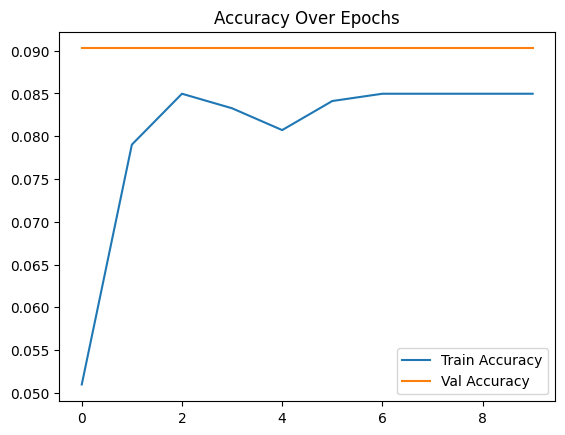

In [19]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Accuracy Over Epochs")
plt.show()

# Save model
model.save("tree_species_model.h5")

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import os

IMG_SIZE = (224, 224)
IMG_HEIGHT, IMG_WIDTH = IMG_SIZE
BATCH_SIZE = 32
dataset_path="/content/Tree_Species_Dataset/Tree_Species_Dataset"
# Create the image data generator
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

# Training generator
train_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

# Validation generator
val_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# Number of output classes
num_classes = train_gen.num_classes

# Build a basic CNN model
model_cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model_cnn.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Train the model
EPOCHS = 10
history_cnn = model_cnn.fit(
    train_gen,
    epochs=EPOCHS,
    validation_data=val_gen
)

# Save the model
model_cnn.save('basic_cnn_tree_species.h5')
print("✅ Basic CNN model saved as 'basic_cnn_tree_species.h5'")


Found 1177 images belonging to 31 classes.
Found 277 images belonging to 31 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 180s 5s/step - accuracy: 0.0349 - loss: 4.0441 - val_accuracy: 0.0903 - val_loss: 3.3720
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 201s 5s/step - accuracy: 0.0751 - loss: 3.3670 - val_accuracy: 0.0939 - val_loss: 3.2485
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 183s 5s/step - accuracy: 0.1020 - loss: 3.2404 - val_accuracy: 0.1733 - val_loss: 2.9740
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 181s 5s/step - accuracy: 0.1468 - loss: 3.0666 - val_accuracy: 0.2419 - val_loss: 2.7801
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 182s 5s/step - accuracy: 0.1687 - loss: 2.9066 - val_accuracy: 0.2238 - val_loss: 2.7105
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 191s 5s/step - accuracy: 0.2078 - loss: 2.8305 - val_accuracy: 0.2383 - val_loss: 2.6487
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 182s 5s/step - accuracy: 0.2050 - loss: 2.7885 - val_accuracy: 0.2383 - val_loss: 2.7001
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 200s 5s/step - accuracy: 0.1855 - loss: 2.7528 - val_accuracy: 0.2635 - v

✅ Basic CNN model saved as 'basic_cnn_tree_species.h5'


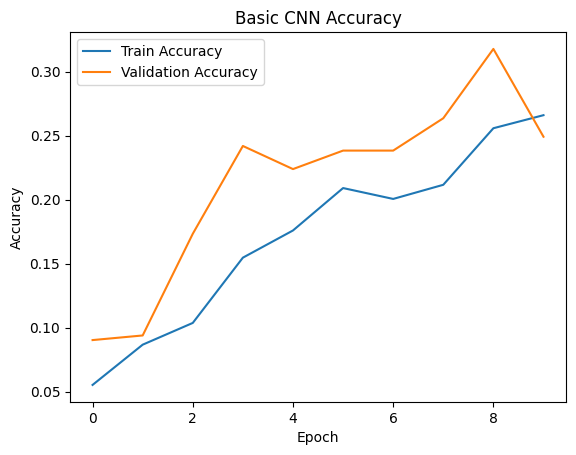

In [21]:
import matplotlib.pyplot as plt

plt.plot(history_cnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.title("Basic CNN Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Parameters
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
IMG_HEIGHT, IMG_WIDTH = IMG_SIZE
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

train_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    seed=42
)

val_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    seed=42,
    shuffle=False
)

# CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(train_gen.num_classes, activation='softmax')  # dynamically uses number of classes
])

model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train Model
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=25
)

# Save Model
model.save("improved_cnn_model.h5")


Found 1177 images belonging to 31 classes.
Found 277 images belonging to 31 classes.
Epoch 1/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 254s 7s/step - accuracy: 0.0636 - loss: 5.1834 - val_accuracy: 0.0433 - val_loss: 5.9690
Epoch 2/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 298s 8s/step - accuracy: 0.1298 - loss: 3.2102 - val_accuracy: 0.0325 - val_loss: 10.4576
Epoch 3/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 277s 7s/step - accuracy: 0.1219 - loss: 3.1186 - val_accuracy: 0.0325 - val_loss: 13.4982
Epoch 4/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 271s 7s/step - accuracy: 0.1381 - loss: 3.1387 - val_accuracy: 0.0361 - val_loss: 14.3909
Epoch 5/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 257s 7s/step - accuracy: 0.1533 - loss: 3.0546 - val_accuracy: 0.0469 - val_loss: 13.8243
Epoch 6/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 302s 8s/step - accuracy: 0.1595 - loss: 3.0381 - val_accuracy: 0.1083 - val_loss: 12.8773
Epoch 7/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 256s 7s/step - accuracy: 0.1858 - loss: 3.0660 - val_accuracy: 0.1155 - val_loss: 10.0316
Epoch 8/25
37/37 ━━━

# New section

# New section